# IBM developer Skills network

In [1]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets._samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                                cluster_std=clusterDeviation)
    
    # Standardize features by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    return X, y

In [3]:
X, y = createDataPoints([[4, 3], [2, -1],[-1, 4]], 1500, 0.5)

## Modeling

In [4]:
epsilon = 0.3   # dense area radius
minimumSamples = 7  # minimum number of sample to be considered as cluster
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

## Distinguish outliers

In [5]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)  # array same shape as labels but with zeros bool
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [6]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # ignoring noise
n_clusters_

3

In [11]:
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2}

## Data visualization

In [12]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

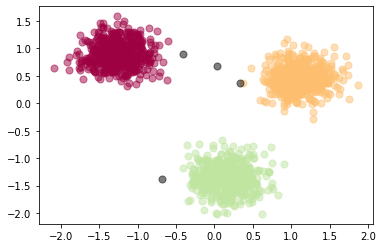

In [13]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


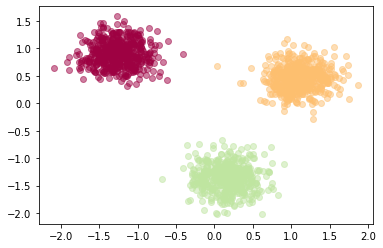

In [14]:
# k-Means
from sklearn.cluster import KMeans
k=3
k_means3 = KMeans(init = 'k-means++', n_clusters=k, n_init=12)
k_means3.fit(X)
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(k), colors):
    my_members = (k_means3.labels_ ==k)
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker=u'o', alpha=0.5)
plt.show()

## Weather station clustering using DBSCAN

In [15]:
import csv
import pandas as pd
import numpy as np

pdf = pd.read_csv('https://raw.githubusercontent.com/sonpn82/Python-machine-learning-project/master/weather-stations20140101-20141231.csv')
pdf.head()

Stn_Name     Lat     Long Prov  ...  BS%    HDD  CDD   Stn_No
0               CHEMAINUS  48.935 -123.742   BC  ...  NaN  273.3  0.0  1011500
1  COWICHAN LAKE FORESTRY  48.824 -124.133   BC  ...  NaN  307.0  0.0  1012040
2           LAKE COWICHAN  48.829 -124.052   BC  ...  NaN  168.1  0.0  1012055
3        DISCOVERY ISLAND  48.425 -123.226   BC  ...  NaN    NaN  NaN  1012475
4     DUNCAN KELVIN CREEK  48.735 -123.728   BC  ...  NaN  267.7  0.0  1012573

[5 rows x 25 columns]

## Data cleaning

In [16]:
# Remove rows that don't have any value in Tm field
pdf = pdf[pd.notnull(pdf["Tm"])]
pdf = pdf.reset_index(drop=True)
pdf.head(5)

Stn_Name     Lat     Long Prov  ...  BS%    HDD  CDD   Stn_No
0               CHEMAINUS  48.935 -123.742   BC  ...  NaN  273.3  0.0  1011500
1  COWICHAN LAKE FORESTRY  48.824 -124.133   BC  ...  NaN  307.0  0.0  1012040
2           LAKE COWICHAN  48.829 -124.052   BC  ...  NaN  168.1  0.0  1012055
3     DUNCAN KELVIN CREEK  48.735 -123.728   BC  ...  NaN  267.7  0.0  1012573
4       ESQUIMALT HARBOUR  48.432 -123.439   BC  ...  NaN  258.6  0.0  1012710

[5 rows x 25 columns]

## Visualization

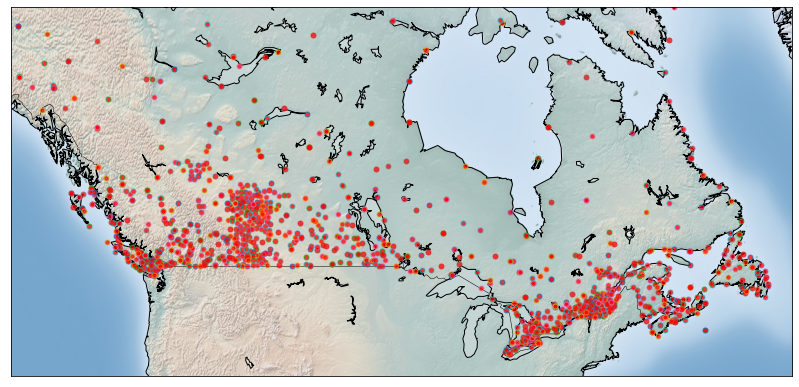

In [17]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

llon=-140
ulon=-50
llat=40
ulat=65

pdf = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) & (pdf['Lat'] > llat) &(pdf['Lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
# my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To collect data based on stations        

xs,ys = my_map(np.asarray(pdf.Long), np.asarray(pdf.Lat))
pdf['xm']= xs.tolist()
pdf['ym'] =ys.tolist()

#Visualization1
for index,row in pdf.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)
plt.show()

## Clustering of stations based on their location 

In [18]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['xm','ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)

Stn_Name    Tx   Tm  Clus_Db
0               CHEMAINUS  13.5  8.2        0
1  COWICHAN LAKE FORESTRY  15.0  7.0        0
2           LAKE COWICHAN  16.0  6.8        0
3     DUNCAN KELVIN CREEK  14.5  7.7        0
4       ESQUIMALT HARBOUR  13.1  8.8        0

In [19]:
set(labels)

{-1, 0, 1, 2, 3, 4}

## Visualization of clustere based on location

<ipython-input-20-814b2feba22e>:25: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
<ipython-input-20-814b2feba22e>:25: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

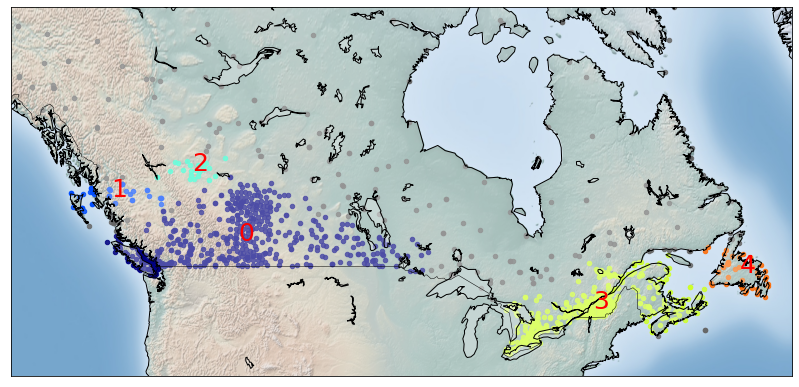

In [20]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))

## Clustering of stations based on their location, mean, max and min temperature

In [21]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['xm','ym','Tx','Tm','Tn']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)

Stn_Name    Tx   Tm  Clus_Db
0               CHEMAINUS  13.5  8.2        0
1  COWICHAN LAKE FORESTRY  15.0  7.0        0
2           LAKE COWICHAN  16.0  6.8        0
3     DUNCAN KELVIN CREEK  14.5  7.7        0
4       ESQUIMALT HARBOUR  13.1  8.8        0

## Visualization of clusters based on location and temperarture

<ipython-input-22-814b2feba22e>:25: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
<ipython-input-22-814b2feba22e>:25: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

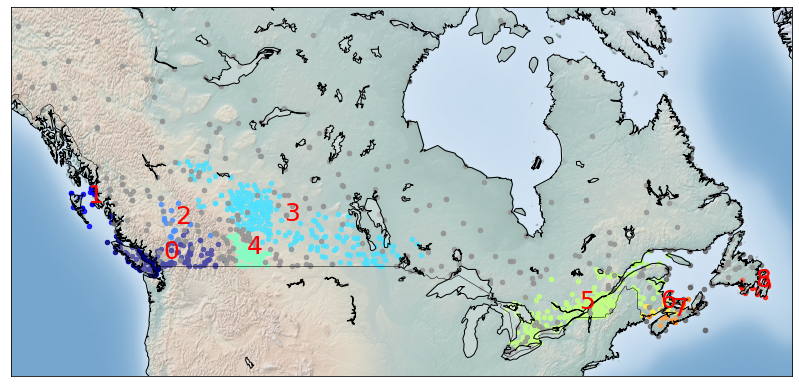

In [22]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))